In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import *
from helpers.dynamic_model import dyn_model, dyn_model_SSD
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

In [3]:
default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.15, 'font.size': 12})
def plot_timeseries(exps=['R2/bare'], labels=None, tmax=30000):
    plt.figure(figsize=(10,10))
    if labels is None:
        labels=exps
    for exp, label in zip(exps, labels):
        try:
            ds = xr.open_dataset(f'/home/ctrsp-2024/pp2681/experiments/NeverWorld2/{exp}/output/ocean.stats.nc', decode_times=False)
        except:
            ds = xr.open_dataset(f'/home/ctrsp-2024/pp2681/experiments/NeverWorld2/{exp}/ocean.stats.nc', decode_times=False)
        plt.subplot(3,1,1)
        ds.max_CFL_lin.plot()
        plt.xlabel('Days')
        ticks = [0,int(tmax/3),int(tmax*2/3),int(tmax)]
        plt.xticks(ticks,ticks)
        plt.xlim([0,tmax])
        plt.grid()

        plt.subplot(3,1,2)
        (ds.KE.sum('Layer')).plot()
        plt.xlabel('Days')
        plt.xticks(ticks,ticks)
        plt.axhline(y=2.45e+18, color='k')
        plt.xlim([0,tmax])
        plt.grid()

        plt.subplot(3,1,3)
        (ds.APE.sum('Interface')).plot(label=label)
        plt.xlabel('Days')
        plt.xticks(ticks,ticks)
        plt.axhline(y=0.958e+20, color='k')
        plt.xlim([0,tmax])
        plt.grid()
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1,1))

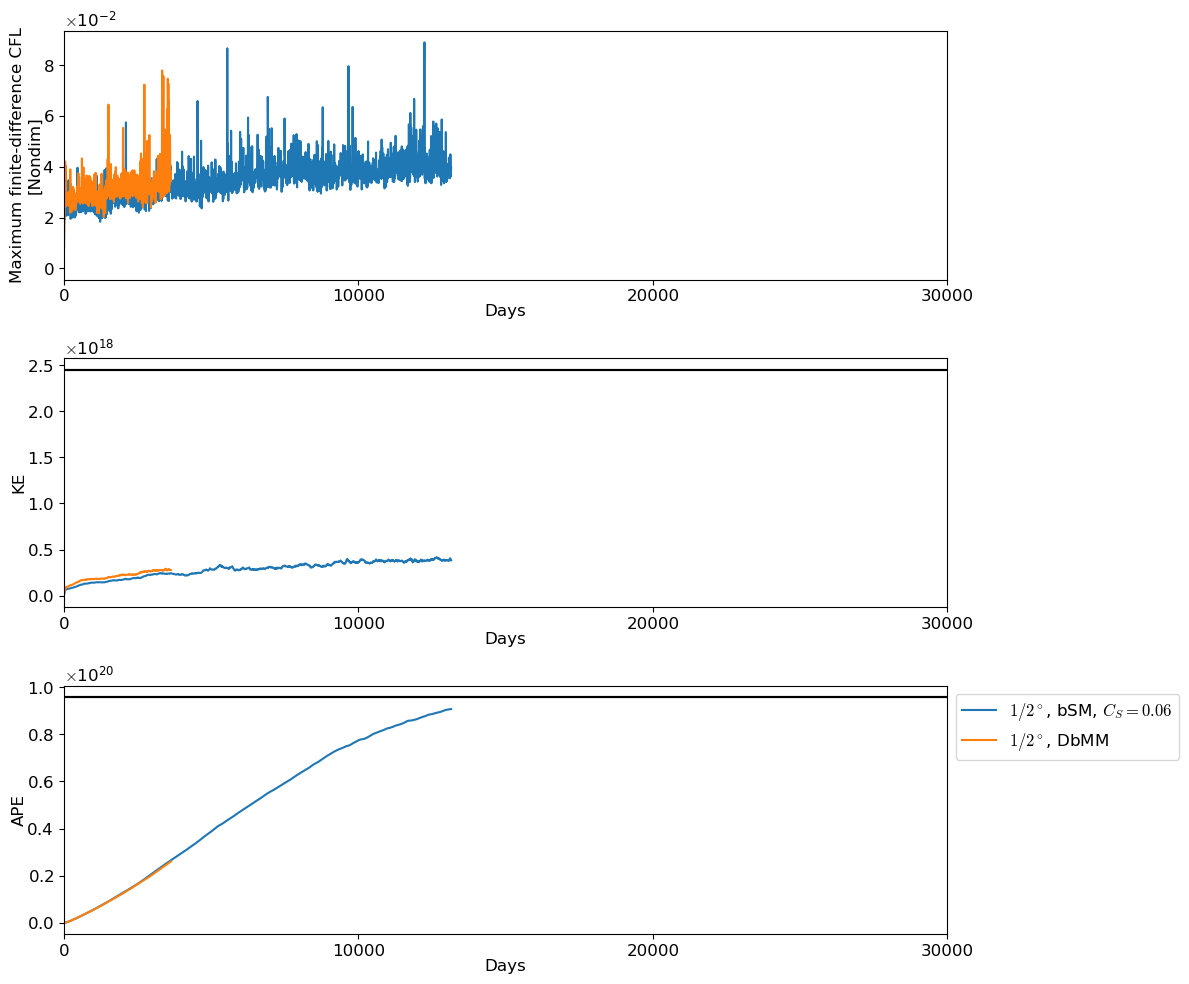

In [10]:
plot_timeseries(['R2/bare', 'R2/DbMM'], ['$1/2^\circ$, bSM, $C_S=0.06$', '$1/2^\circ$, DbMM'])
plt.savefig('NW2-R2.png', dpi=150, bbox_inches='tight')